In [1]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dtale as dt
from hijridate import Hijri, Gregorian
from datetime import date
import sweetviz as sv


## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [2]:
#Read in the csv file and convert to a Pandas dataframe
dfs: dict[str, pd.DataFrame] = {
    "raw": pd.read_csv("data/Jadarat_data.csv"),
}

df = dfs['raw'].copy()

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [3]:
df.shape

(1470, 18)

In [4]:
# here we will display the dataframe normally
display(df.head(2))

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
0,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350419,0 Years,both
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,NaN,المنطقة الشرقية,AD DAMMAM...,"['Salary', '5000.0']",دوام كامل,0 / 3,20202026350389,0 Years,both


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [5]:
# will be used to profiling the data along with the manual approach
d_t = dt.show(df, host='localhost')#, subprocess=False)

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [6]:
# markdown below shows this

- **Source**: From Jadarat by Kaggle user
- **License**: CC0: Public Domain

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [7]:
# markdown below shows this

**Timeliness:** The dates in the dataset belongs to 2022 (1444 Hijra)

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [8]:
# all good for now

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [9]:
# here we save the old data before modifying it for this stage

In [10]:
dfs["relevance"] = df.copy()
df = dfs["relevance"]

In [11]:
df.head(2)

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
0,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350419,0 Years,both
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,NaN,المنطقة الشرقية,AD DAMMAM...,"['Salary', '5000.0']",دوام كامل,0 / 3,20202026350389,0 Years,both


**<p style="color:red">We drop columns with no use for our case</p>**

In [12]:
df = df.drop("comp_no", axis=1)

In [13]:
df = df.drop("job_post_id", axis=1)

In [14]:
df.head(2)

,job_title,job_date,job_desc,job_tasks,comp_name,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,exper,gender
0,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,0 Years,both
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,NaN,المنطقة الشرقية,AD DAMMAM...,"['Salary', '5000.0']",دوام كامل,0 / 3,0 Years,both


#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [15]:
dfs["uniqueness"] = df.copy()
df = dfs["uniqueness"]
df

,job_title,job_date,job_desc,job_tasks,comp_name,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,exper,gender
0,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,0 Years,both
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,NaN,المنطقة الشرقية,AD DAMMAM...,"['Salary', '5000.0']",دوام كامل,0 / 3,0 Years,both
2,أخصائي عمليات موارد بشرية,27/05/1444,['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركه دار السلام,خاص,متوسطة فئة أ,ترميمات المباني السكنية والغير سكنية,"['Language data', 'الانجليزيه', 'محترف']",الرياض,ATH THUMA...,"['Salary', '4000.0']",دوام كامل,0 / 2,2 Years,both
3,ميكانيكي سيارات,27/05/1444,['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...,[' فحص أداء المعدّات الكهربائية والميكانيكية...,مؤسسة لمكو لغيار الزيوت,خاص,صغيرة فئة ب,NaN,"['Skill data', 'صيانة السيارات وتقييم الاعطال'...",المنطقة الشرقية,AL HUFUF...,"['Salary', '5000.0']",دوام كامل,0 / 10,0 Years,M
4,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,مؤسسة فكرة اليمامة للمقاولات,خاص,كبيرة,الإنشاءات العامة للمباني السكنية,"['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,0 Years,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,مهندس تقنية معلومات,19/06/1444,['دراسة احتياجات العميل من الأجهزة الحاسوبية و...,[' متابعة وتقييم عملية جمع وتحليل المعطيات و...,مطعم الاوراق الخضر لتقديم الوجبات,خاص,صغيرة فئة ب,المطاعم مع الخدمة,NaN,الرياض,AR RIYADH...,"['Salary', '5500.0']",دوام كامل,0 / 1,0 Years,both
1466,سكرتير,19/06/1444,['دعم المدير أو الإدارة من خلال كتابة الوثائق ...,[' تدوين الملاحظات، التي يتم إملاؤها، بطريقة...,شركة ملتقى التجار لحاضنات و مسرعات الأعمال,خاص,صغيرة فئة ب,أنشطة حاضنات ومسرعات الأعمال,"['Skill data', 'فن التواصل', 'محترف', 'Languag...",مكة المكرمة,JEDDAH...,"['Salary', '4000.0']",دوام كامل,0 / 1,2 Years,both
1467,صيدلي,18/06/1444,['دراسة التركيبات الدوائية للعقاقير والعلاجات ...,[' دراسة مواصفات وتركيبات الادوية والعقاقير ...,شركة تقنية الدواجن والألبان للتجارة,خاص,صغيرة فئة ب,NaN,"['Professional certificate \\ License data', '...",الرياض,AR RIYADH...,"['Salary', '7000.0']",دوام كامل,0 / 1,0 Years,both
1468,مشغل آلة تشطيب رخام,18/06/1444,['تشغيل آلة تشطيب الرخام وابعادء الأجزاء المتف...,[' تسوية الرخام بواسطة أقراص الألماس الحديدي...,مصنع عبدالرحمن بن محمد بن عبدالعزيز العبدالقاد...,خاص,صغيرة فئة أ,NaN,"['Skill data', 'متقن للعمل وشغوف ويرغب بالتطور...",المنطقة الشرقية,AL KHUBAR...,"['Salary', '4000.0', 'Benefits', 'اجازة سنوية ...",دوام كامل,0 / 3,0 Years,M


In [16]:
# this shows that there is duplicates in the dataset even it is false
print(df.duplicated().sum())
df[df.duplicated(keep=False)]

8


,job_title,job_date,job_desc,job_tasks,comp_name,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,exper,gender
236,محضر أطعمة باردة,20/04/1444,['تحديد الأدوات والمواد والمستلزمات اللازمة لإ...,[' تحديد الأدوات والمواد والمستلزمات المطلوب...,بوفية محمدحسن احمد جبر لتقديم الوجبات,خاص,صغيرة فئة ب,محلات تقديم وجبات الفول و الحمص و الكبدة والبل...,"['Professional certificate \\ License data', '...",مكة المكرمة,MAKKAH AL...,"['Salary', '4000.0']",دوام كامل,0 / 1,0 Years,M
237,محضر أطعمة باردة,20/04/1444,['تحديد الأدوات والمواد والمستلزمات اللازمة لإ...,[' تحديد الأدوات والمواد والمستلزمات المطلوب...,بوفية محمدحسن احمد جبر لتقديم الوجبات,خاص,صغيرة فئة ب,محلات تقديم وجبات الفول و الحمص و الكبدة والبل...,"['Professional certificate \\ License data', '...",مكة المكرمة,MAKKAH AL...,"['Salary', '4000.0']",دوام كامل,0 / 1,0 Years,M
354,بائع,09/04/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",مؤسسة تصميم الخزامى التجارية,خاص,صغيرة فئة ب,تقديم العصائر الطازجة و المشروبات الباردة,NaN,الرياض,HAWTAT BA...,"['Salary', '4000.0']",دوام كامل,0 / 1,0 Years,M
355,بائع,09/04/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",مؤسسة تصميم الخزامى التجارية,خاص,صغيرة فئة ب,تقديم العصائر الطازجة و المشروبات الباردة,NaN,الرياض,HAWTAT BA...,"['Salary', '4000.0']",دوام كامل,0 / 1,0 Years,M
485,محامي,29/03/1444,['دراسة القضية وتجهيز ملفها وجمع البينات الخطي...,[' استقبال القضية وتحديد نوعها وتحليل عناصره...,مكتب عبدالمحسن المحرج للمحاماة والاستشارات,خاص,صغيرة فئة ب,أنشطة المحاماة والاستشارات القانونية,NaN,الرياض,AR RIYADH...,"['Salary', '5500.0', 'Benefits', 'راتب أساسي ف...",دوام كامل,0 / 1,4 Years,F
487,محامي,29/03/1444,['دراسة القضية وتجهيز ملفها وجمع البينات الخطي...,[' استقبال القضية وتحديد نوعها وتحليل عناصره...,مكتب عبدالمحسن المحرج للمحاماة والاستشارات,خاص,صغيرة فئة ب,أنشطة المحاماة والاستشارات القانونية,NaN,الرياض,AR RIYADH...,"['Salary', '5500.0', 'Benefits', 'راتب أساسي ف...",دوام كامل,0 / 1,4 Years,F
623,مهندس شبكات,30/04/1444,['إعداد مخططات ومواصفات خطوط شبكات الحاسب الآل...,[' دراسة متطلبات العمل وإعداد المخططات التفص...,شركه العرض المتقن للخدمات التجارية شركة مساهمة...,خاص,عملاقة,التسجيل لتقديم خدمات الحوسبة السحابية,NaN,المنطقة الشرقية,HAFAR AL ...,"['Salary', '9500.0']",دوام كامل,0 / 1,4 Years,both
624,مهندس شبكات,30/04/1444,['إعداد مخططات ومواصفات خطوط شبكات الحاسب الآل...,[' دراسة متطلبات العمل وإعداد المخططات التفص...,شركه العرض المتقن للخدمات التجارية شركة مساهمة...,خاص,عملاقة,التسجيل لتقديم خدمات الحوسبة السحابية,NaN,المنطقة الشرقية,HAFAR AL ...,"['Salary', '9500.0']",دوام كامل,0 / 1,4 Years,both
722,محلل مبرمج,20/05/1444,['القيام بالتحليل والبرمجة في تطوير وتنفيذ ودع...,[' تطوير التطبيقات وقواعد البيانات من خلال ت...,شركة كيه لتقنية المعلومات,خاص,صغيرة فئة ب,تصميم المواقع الاكترونية,NaN,الرياض,AR RIYADH...,"['Salary', '8000.0']",دوام كامل,0 / 1,0 Years,M
723,محلل مبرمج,20/05/1444,['القيام بالتحليل والبرمجة في تطوير وتنفيذ ودع...,[' تطوير التطبيقات وقواعد البيانات من خلال ت...,شركة كيه لتقنية المعلومات,خاص,صغيرة فئة ب,تصميم المواقع الاكترونية,NaN,الرياض,AR RIYADH...,"['Salary', '8000.0']",دوام كامل,0 / 1,0 Years,M


In [17]:
df = df.drop_duplicates(keep='first')
print(df.duplicated().sum())

0


In [18]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [19]:
#Display number missing values per column

In [20]:
dfs["completeness"] = df.copy()
df = dfs["completeness"]
df

,job_title,job_date,job_desc,job_tasks,comp_name,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,exper,gender
0,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,0 Years,both
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,NaN,المنطقة الشرقية,AD DAMMAM...,"['Salary', '5000.0']",دوام كامل,0 / 3,0 Years,both
2,أخصائي عمليات موارد بشرية,27/05/1444,['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركه دار السلام,خاص,متوسطة فئة أ,ترميمات المباني السكنية والغير سكنية,"['Language data', 'الانجليزيه', 'محترف']",الرياض,ATH THUMA...,"['Salary', '4000.0']",دوام كامل,0 / 2,2 Years,both
3,ميكانيكي سيارات,27/05/1444,['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...,[' فحص أداء المعدّات الكهربائية والميكانيكية...,مؤسسة لمكو لغيار الزيوت,خاص,صغيرة فئة ب,NaN,"['Skill data', 'صيانة السيارات وتقييم الاعطال'...",المنطقة الشرقية,AL HUFUF...,"['Salary', '5000.0']",دوام كامل,0 / 10,0 Years,M
4,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,مؤسسة فكرة اليمامة للمقاولات,خاص,كبيرة,الإنشاءات العامة للمباني السكنية,"['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,0 Years,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,بائع,21/06/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة النجمة الذهبية للتبريد والتكييف شركة شخص ...,خاص,صغيرة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,NaN,المنطقة الشرقية,AL HUFUF...,"['Salary', '4000.0']",دوام كامل,0 / 1,2 Years,F
1465,مهندس تقنية معلومات,19/06/1444,['دراسة احتياجات العميل من الأجهزة الحاسوبية و...,[' متابعة وتقييم عملية جمع وتحليل المعطيات و...,مطعم الاوراق الخضر لتقديم الوجبات,خاص,صغيرة فئة ب,المطاعم مع الخدمة,NaN,الرياض,AR RIYADH...,"['Salary', '5500.0']",دوام كامل,0 / 1,0 Years,both
1466,سكرتير,19/06/1444,['دعم المدير أو الإدارة من خلال كتابة الوثائق ...,[' تدوين الملاحظات، التي يتم إملاؤها، بطريقة...,شركة ملتقى التجار لحاضنات و مسرعات الأعمال,خاص,صغيرة فئة ب,أنشطة حاضنات ومسرعات الأعمال,"['Skill data', 'فن التواصل', 'محترف', 'Languag...",مكة المكرمة,JEDDAH...,"['Salary', '4000.0']",دوام كامل,0 / 1,2 Years,both
1467,صيدلي,18/06/1444,['دراسة التركيبات الدوائية للعقاقير والعلاجات ...,[' دراسة مواصفات وتركيبات الادوية والعقاقير ...,شركة تقنية الدواجن والألبان للتجارة,خاص,صغيرة فئة ب,NaN,"['Professional certificate \\ License data', '...",الرياض,AR RIYADH...,"['Salary', '7000.0']",دوام كامل,0 / 1,0 Years,both


**$$\color{red}Missing \space Data$$**

![alt text](images/missing_values.png)

**Missing Data (Using D-tale)**
  - **comp_size:** 14 missing entries
  - **eco_activity:** 90 missing entries
  - **qualif:** 690 missing entries

<span style="color:red">Date have fake nulls</span>


![alt text](images/missing_value_date.png)

In [21]:
df[df["job_date"] == "Publish date"]

,job_title,job_date,job_desc,job_tasks,comp_name,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,exper,gender
878,مدير مطعم,Publish date,['تخطيط عمليات المطعم وتوجيهها وتنسيقها، وإدار...,[' إدارة عملية تخطيط وتقديم الأطعمة والمشروب...,مطعم طبيعي للوجبات السريعة,خاص,صغيرة فئة ب,المطاعم مع الخدمة,NaN,المنطقة الشرقية,AD DAMMAM...,"['Salary', '4000.0']",دوام كامل,0 / 1,0 Years,M
879,مندوب مبيعات,Publish date,['جمع البيانات والمواصفات المتعلقة بالمنتجات (...,[' بناء قاعدة بينات للعملاء الحاليين والمرتق...,مؤسسة درجة تجمد التجارية,خاص,صغيرة فئة أ,البيع بالتجزئة للأجهزة الالكترونية والكهربائية...,NaN,المنطقة الشرقية,AL HUFUF...,"['Salary', '4000.0']",دوام كامل,0 / 1,2 Years,F
880,نادل,Publish date,['استقبال العملاء وتزويدهم بقوائم الاطعمة والم...,[' استقبال العملاء وتزويدهم بقوائم الأطعمة و...,مؤسسة هوى لبنان لتقديم الوجبات,خاص,صغيرة فئة ب,المطاعم مع الخدمة,"['Skill data', 'اللباقة', 'محترف', 'مهارة البي...",المدينة المنورة,YANBU...,"['Salary', '4000.0', 'Benefits', 'تامين طبي ']",دوام كامل,0 / 3,0 Years,F
881,موظف استقبال فندق,Publish date,['الإشراف على خدمات الضيوف في مكتب الاستقبال، ...,[' الحفاظ على قائمة الحجوزات، وتوفير السجلات...,فندق ظاظا الفندقية,خاص,صغيرة فئة أ,NaN,NaN,مكة المكرمة,ABU MARAG...,"['Salary', '4082.0']",دوام كامل,0 / 1,0 Years,M
882,موظف استقبال,Publish date,['استقبال الزوار والعملاء وتحديد مطالبهم وتوجي...,[' استقبال الزوار والعملاء والترحيب بهم وتحد...,ورشة عبدالعزيز حسين آل ناجي لصيانة السيارات,خاص,صغيرة فئة ب,إصلاح محاور وفرامل السيارات,NaN,عسير,KHAMIS MU...,"['Salary', '4000.0']",دوام كامل,0 / 1,0 Years,M
883,بائع,Publish date,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",مؤسسة شذرات للسراميك,خاص,صغيرة فئة ب,البيع بالتجزئة للرخام والحجر الطبيعي والاصطناع...,NaN,المنطقة الشرقية,AD DAMMAM...,"['Salary', '4000.0', 'Benefits', 'عمولات مجزية']",دوام كامل,1 / 2,0 Years,both
884,بائع,Publish date,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",مؤسسة مأكولات الشيف لخدمات الاعاشة,خاص,صغيرة فئة أ,البيع بالتجزئة لمنتجات المخابز والحلويات السكرية,"['Skill data', 'اللباقه وحسن التصرف', 'محترف',...",مكة المكرمة,MAKKAH AL...,"['Salary', '6000.0']",عمل عن بعد,0 / 1,2 Years,F
885,مدير مكتب,Publish date,['الإشراف المباشرعلى أنشطة إدارة وتخطيط وتنظيم...,[' إدارة وتوجيه عمليات وإجراءات تنسيق اجتماع...,شركة مجموعة مبتكرون المتحدة للتطوير والاستثمار...,خاص,صغيرة فئة أ,إدارة وتاجير العقارات المملوكة أو المؤجرة (سكن...,NaN,الرياض,AR RIYADH...,"['Salary', '6000.0']",دوام كامل,0 / 1,2 Years,both
886,سكرتير تنفيذي,Publish date,['تنظيم المواعيد وإعداد المذكرات وإجراء المراس...,[' تنظيم مواعيد المدير/الرئيس وتذكيره بها، و...,مؤسسة وهيب محمد راشد الوافي مقاولات عامه,خاص,صغيرة فئة ب,ترميمات المباني السكنية والغير سكنية,"['Skill data', 'ميداني', 'محترف', 'Language da...",مكة المكرمة,JEDDAH...,"['Salary', '4000.0']",دوام كامل,0 / 1,4 Years,F
887,فني عمليات تقنية معلومات,Publish date,['تطبيق وتنفيذ الخطط المتعلقة بعمليات تقنية ال...,[' تطبيق وتنفيذ الخطط الفنية المرسومة المتعل...,مركز التوحد الأول بجدة,خاص,متوسطة فئة أ,الجمعيات التعاونية,"['Language data', 'اللغة الانجليزية', 'محترف']",مكة المكرمة,JEDDAH...,"['Salary', '4000.0']",دوام كامل,0 / 1,2 Years,F


In [22]:
df = df.drop(df[df["job_date"] == "Publish date"].index,axis=0 )

In [23]:
df[df["job_date"] == "Publish date"]

,job_title,job_date,job_desc,job_tasks,comp_name,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,exper,gender


In [24]:
df.isnull().sum()

job_title         0
job_date          0
job_desc          0
job_tasks         0
comp_name         0
comp_type         0
comp_size        14
eco_activity     83
qualif          660
region            0
city              0
benefits          0
contract          0
positions         0
exper             0
gender            0
dtype: int64

In [25]:
# fix the null here by replacing it by Unknown
df['eco_activity'] = df['eco_activity'].replace({
	np.nan: 'Unknown',
})

In [26]:
# fix the null here by replacing it by empty list
df['qualif'] = df['qualif'].replace({
	np.nan: '[]',
})

In [27]:
df['comp_size'] = df['comp_size'].replace({
	np.nan: 'Unknown',
})

In [28]:
df.isnull().sum()

job_title       0
job_date        0
job_desc        0
job_tasks       0
comp_name       0
comp_type       0
comp_size       0
eco_activity    0
qualif          0
region          0
city            0
benefits        0
contract        0
positions       0
exper           0
gender          0
dtype: int64

In [29]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [30]:
# check columns types 
df.dtypes

job_title       object
job_date        object
job_desc        object
job_tasks       object
comp_name       object
comp_type       object
comp_size       object
eco_activity    object
qualif          object
region          object
city            object
benefits        object
contract        object
positions       object
exper           object
gender          object
dtype: object

**<span style="color:red">data types need to change:</span>**
- <span style="color:red">benefits (contains the salary we need to extract it) -> number</span>
- <span style="color:red">positions (contains open position / total positions) -> 2 columns of numbers</span>
- <span style="color:red">exper (contains years of experience needed) -> number</span>
- <span style="color:red">qualif, job_desc, and job_tasks -> list</span>

In [31]:
df.head(2)

,job_title,job_date,job_desc,job_tasks,comp_name,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,exper,gender
0,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,0 Years,both
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,[],المنطقة الشرقية,AD DAMMAM...,"['Salary', '5000.0']",دوام كامل,0 / 3,0 Years,both


In [32]:
df["benefits"] = df["benefits"].map(lambda x: eval(x)[1])

In [33]:
df.head(5)

,job_title,job_date,job_desc,job_tasks,comp_name,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,exper,gender
0,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH...,5000.0,دوام كامل,0 / 1,0 Years,both
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,[],المنطقة الشرقية,AD DAMMAM...,5000.0,دوام كامل,0 / 3,0 Years,both
2,أخصائي عمليات موارد بشرية,27/05/1444,['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركه دار السلام,خاص,متوسطة فئة أ,ترميمات المباني السكنية والغير سكنية,"['Language data', 'الانجليزيه', 'محترف']",الرياض,ATH THUMA...,4000.0,دوام كامل,0 / 2,2 Years,both
3,ميكانيكي سيارات,27/05/1444,['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...,[' فحص أداء المعدّات الكهربائية والميكانيكية...,مؤسسة لمكو لغيار الزيوت,خاص,صغيرة فئة ب,Unknown,"['Skill data', 'صيانة السيارات وتقييم الاعطال'...",المنطقة الشرقية,AL HUFUF...,5000.0,دوام كامل,0 / 10,0 Years,M
4,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,مؤسسة فكرة اليمامة للمقاولات,خاص,كبيرة,الإنشاءات العامة للمباني السكنية,"['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...",الرياض,AR RIYADH...,5000.0,دوام كامل,0 / 1,0 Years,both


In [34]:
# here we change the type after extracting it
df["benefits"] = df["benefits"].astype(float)

# since this is salary and not benefits anymore lets rename it
df = df.rename({"benefits": "salary"}, axis=1)

In [35]:
df.dtypes

job_title        object
job_date         object
job_desc         object
job_tasks        object
comp_name        object
comp_type        object
comp_size        object
eco_activity     object
qualif           object
region           object
city             object
salary          float64
contract         object
positions        object
exper            object
gender           object
dtype: object

**<span style="color:red">data types need to change:</span>**
- <span style="color:red">job_date -> date</span>
- <span style="color:red">positions (contains open position / total positions) -> 2 columns of numbers</span>
- <span style="color:red">exper (contains years of experience needed) -> number</span>
- <span style="color:red">qualif, job_desc, and job_tasks -> list</span>

In [36]:
def converter(x: str) -> str:
    try:
        # Split the date string into components
        d, m, y = x.split("/")
        # Convert Hijri date to Gregorian date
        gregorian_date = Hijri(int(y), int(m), int(d)).to_gregorian()
        return f"{gregorian_date.year}-{gregorian_date.month:02d}-{gregorian_date.day:02d}"
    except ValueError:
        # If the date format is not correct, return the original value
        return x

df["job_date"] = pd.to_datetime(df["job_date"].map(converter), errors='coerce')

**<span style="color:red">data types need to change:</span>**
- <span style="color:red">positions (contains open position / total positions) -> 2 columns of numbers</span>
- <span style="color:red">exper (contains years of experience needed) -> number</span>
- <span style="color:red">qualif, job_desc, and job_tasks -> list</span>

In [37]:
df.head(2)

,job_title,job_date,job_desc,job_tasks,comp_name,comp_type,comp_size,eco_activity,qualif,region,city,salary,contract,positions,exper,gender
0,محاسب,2022-12-21,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH...,5000.0,دوام كامل,0 / 1,0 Years,both
1,بائع,2022-12-21,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,[],المنطقة الشرقية,AD DAMMAM...,5000.0,دوام كامل,0 / 3,0 Years,both


In [38]:
# first i will rename first column
df = df.rename({"positions": "open_positions"}, axis=1)

In [39]:
# here we split it
df["total_positions"] = df["open_positions"].str.split(" / ",expand=True)[1].astype(int)
df["open_positions"] = df["open_positions"].str.split(" / ",expand=True)[0].astype(int)

In [40]:
df.dtypes

job_title                  object
job_date           datetime64[ns]
job_desc                   object
job_tasks                  object
comp_name                  object
comp_type                  object
comp_size                  object
eco_activity               object
qualif                     object
region                     object
city                       object
salary                    float64
contract                   object
open_positions              int32
exper                      object
gender                     object
total_positions             int32
dtype: object

In [41]:
df.head(2)

,job_title,job_date,job_desc,job_tasks,comp_name,comp_type,comp_size,eco_activity,qualif,region,city,salary,contract,open_positions,exper,gender,total_positions
0,محاسب,2022-12-21,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH...,5000.0,دوام كامل,0,0 Years,both,1
1,بائع,2022-12-21,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,[],المنطقة الشرقية,AD DAMMAM...,5000.0,دوام كامل,0,0 Years,both,3


**<span style="color:red">data types need to change:</span>**
- <span style="color:red">exper (contains years of experience needed) -> number</span>
- <span style="color:red">qualif, job_desc, and job_tasks -> list</span>

In [42]:
df.head(2)

,job_title,job_date,job_desc,job_tasks,comp_name,comp_type,comp_size,eco_activity,qualif,region,city,salary,contract,open_positions,exper,gender,total_positions
0,محاسب,2022-12-21,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH...,5000.0,دوام كامل,0,0 Years,both,1
1,بائع,2022-12-21,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,[],المنطقة الشرقية,AD DAMMAM...,5000.0,دوام كامل,0,0 Years,both,3


In [43]:
df["exper"] = df["exper"].str.split(expand=True)[0].astype(int)

In [44]:
df.head(2)

,job_title,job_date,job_desc,job_tasks,comp_name,comp_type,comp_size,eco_activity,qualif,region,city,salary,contract,open_positions,exper,gender,total_positions
0,محاسب,2022-12-21,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH...,5000.0,دوام كامل,0,0,both,1
1,بائع,2022-12-21,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,[],المنطقة الشرقية,AD DAMMAM...,5000.0,دوام كامل,0,0,both,3


**<span style="color:red">data types need to change:</span>**
- <span style="color:red">qualif, job_desc, and job_tasks -> list</span>

In [45]:
df.head(2)

,job_title,job_date,job_desc,job_tasks,comp_name,comp_type,comp_size,eco_activity,qualif,region,city,salary,contract,open_positions,exper,gender,total_positions
0,محاسب,2022-12-21,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH...,5000.0,دوام كامل,0,0,both,1
1,بائع,2022-12-21,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,[],المنطقة الشرقية,AD DAMMAM...,5000.0,دوام كامل,0,0,both,3


In [46]:
# similar to above steps we will use eval to evaluate the list
# df["job_desc"] = df["job_desc"].map(lambda x: eval(x))
# df["job_tasks"] = df["job_tasks"].map(lambda x: eval(x))
# df["qualif"] = df["qualif"].map(lambda x: eval(x))

In [47]:
df.head(2)

,job_title,job_date,job_desc,job_tasks,comp_name,comp_type,comp_size,eco_activity,qualif,region,city,salary,contract,open_positions,exper,gender,total_positions
0,محاسب,2022-12-21,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH...,5000.0,دوام كامل,0,0,both,1
1,بائع,2022-12-21,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,[],المنطقة الشرقية,AD DAMMAM...,5000.0,دوام كامل,0,0,both,3


In [48]:
'''
we are finished with first step. we will go D-tale before next step
'''

'\nwe are finished with first step. we will go D-tale before next step\n'

**$$\color{red}Good \space Data \space Types$$**

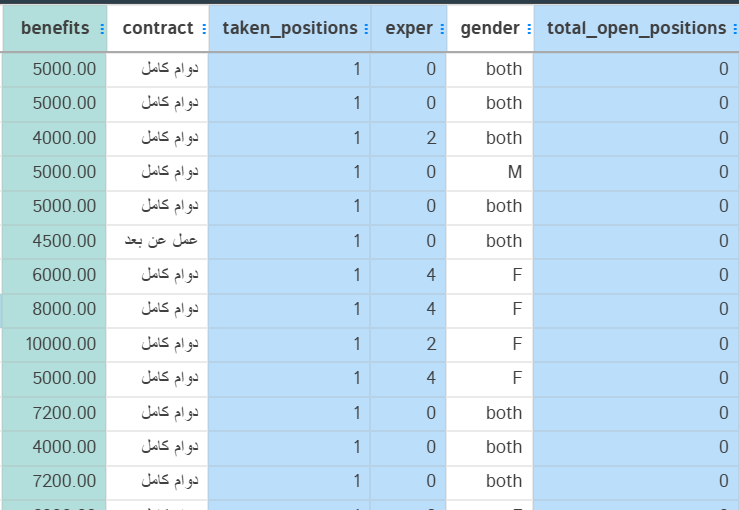

|Color|Meaning|
|-----|-------|
|blue | int   |
|green| float |

In [49]:
# go to clean them 

In [50]:
# check outliers 

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [51]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [52]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

**$$\color{red} All \space Natural \space Outliers$$**

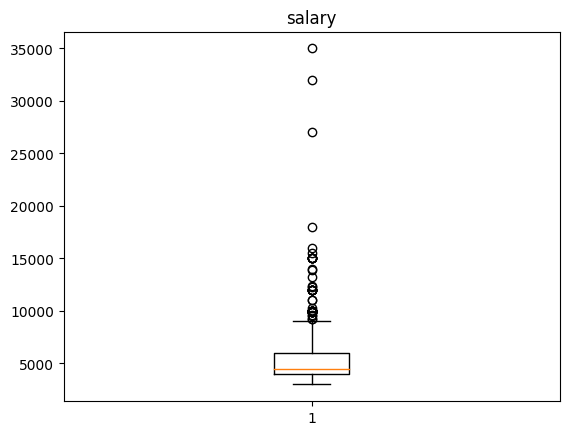

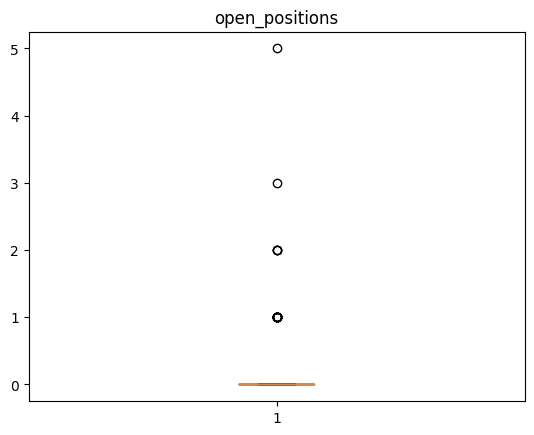

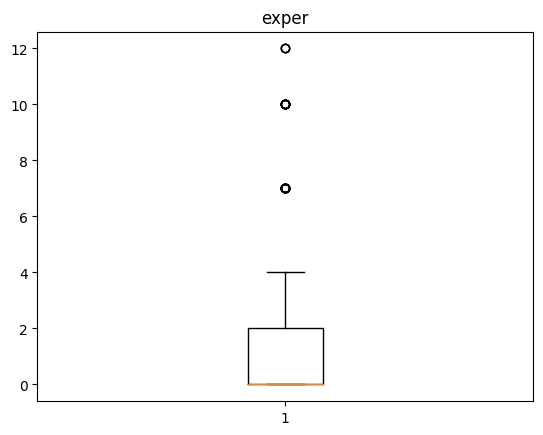

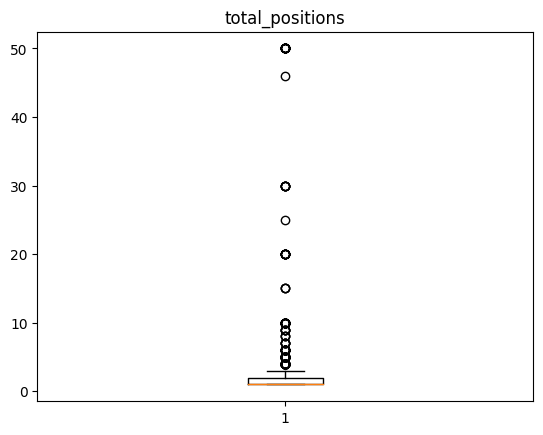

In [53]:
for d in df.select_dtypes(include=[int, float]):
    plt.boxplot(df[d])
    plt.title(d)
    plt.show()

In [54]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [55]:
dfs["update"] = df.copy()
df = dfs["update"]
df

,job_title,job_date,job_desc,job_tasks,comp_name,comp_type,comp_size,eco_activity,qualif,region,city,salary,contract,open_positions,exper,gender,total_positions
0,محاسب,2022-12-21,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH...,5000.0,دوام كامل,0,0,both,1
1,بائع,2022-12-21,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,[],المنطقة الشرقية,AD DAMMAM...,5000.0,دوام كامل,0,0,both,3
2,أخصائي عمليات موارد بشرية,2022-12-21,['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركه دار السلام,خاص,متوسطة فئة أ,ترميمات المباني السكنية والغير سكنية,"['Language data', 'الانجليزيه', 'محترف']",الرياض,ATH THUMA...,4000.0,دوام كامل,0,2,both,2
3,ميكانيكي سيارات,2022-12-21,['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...,[' فحص أداء المعدّات الكهربائية والميكانيكية...,مؤسسة لمكو لغيار الزيوت,خاص,صغيرة فئة ب,Unknown,"['Skill data', 'صيانة السيارات وتقييم الاعطال'...",المنطقة الشرقية,AL HUFUF...,5000.0,دوام كامل,0,0,M,10
4,محاسب,2022-12-21,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,مؤسسة فكرة اليمامة للمقاولات,خاص,كبيرة,الإنشاءات العامة للمباني السكنية,"['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...",الرياض,AR RIYADH...,5000.0,دوام كامل,0,0,both,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,بائع,2023-01-14,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة النجمة الذهبية للتبريد والتكييف شركة شخص ...,خاص,صغيرة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,[],المنطقة الشرقية,AL HUFUF...,4000.0,دوام كامل,0,2,F,1
1465,مهندس تقنية معلومات,2023-01-12,['دراسة احتياجات العميل من الأجهزة الحاسوبية و...,[' متابعة وتقييم عملية جمع وتحليل المعطيات و...,مطعم الاوراق الخضر لتقديم الوجبات,خاص,صغيرة فئة ب,المطاعم مع الخدمة,[],الرياض,AR RIYADH...,5500.0,دوام كامل,0,0,both,1
1466,سكرتير,2023-01-12,['دعم المدير أو الإدارة من خلال كتابة الوثائق ...,[' تدوين الملاحظات، التي يتم إملاؤها، بطريقة...,شركة ملتقى التجار لحاضنات و مسرعات الأعمال,خاص,صغيرة فئة ب,أنشطة حاضنات ومسرعات الأعمال,"['Skill data', 'فن التواصل', 'محترف', 'Languag...",مكة المكرمة,JEDDAH...,4000.0,دوام كامل,0,2,both,1
1467,صيدلي,2023-01-11,['دراسة التركيبات الدوائية للعقاقير والعلاجات ...,[' دراسة مواصفات وتركيبات الادوية والعقاقير ...,شركة تقنية الدواجن والألبان للتجارة,خاص,صغيرة فئة ب,Unknown,"['Professional certificate \\ License data', '...",الرياض,AR RIYADH...,7000.0,دوام كامل,0,0,both,1


**<p style="color:red">We fix the city naming here (remove punctuation)</p>**

In [56]:
df.head(2)

,job_title,job_date,job_desc,job_tasks,comp_name,comp_type,comp_size,eco_activity,qualif,region,city,salary,contract,open_positions,exper,gender,total_positions
0,محاسب,2022-12-21,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH...,5000.0,دوام كامل,0,0,both,1
1,بائع,2022-12-21,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,[],المنطقة الشرقية,AD DAMMAM...,5000.0,دوام كامل,0,0,both,3


In [57]:
import string  

df['city'] = df['city'].map(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

In [58]:
df.head(2)

,job_title,job_date,job_desc,job_tasks,comp_name,comp_type,comp_size,eco_activity,qualif,region,city,salary,contract,open_positions,exper,gender,total_positions
0,محاسب,2022-12-21,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH,5000.0,دوام كامل,0,0,both,1
1,بائع,2022-12-21,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,[],المنطقة الشرقية,AD DAMMAM,5000.0,دوام كامل,0,0,both,3


In [59]:
df.head(2)

,job_title,job_date,job_desc,job_tasks,comp_name,comp_type,comp_size,eco_activity,qualif,region,city,salary,contract,open_positions,exper,gender,total_positions
0,محاسب,2022-12-21,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH,5000.0,دوام كامل,0,0,both,1
1,بائع,2022-12-21,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,[],المنطقة الشرقية,AD DAMMAM,5000.0,دوام كامل,0,0,both,3


In [60]:
df.dtypes

job_title                  object
job_date           datetime64[ns]
job_desc                   object
job_tasks                  object
comp_name                  object
comp_type                  object
comp_size                  object
eco_activity               object
qualif                     object
region                     object
city                       object
salary                    float64
contract                   object
open_positions              int32
exper                       int32
gender                     object
total_positions             int32
dtype: object

In [61]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [62]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


**$$\color{red} All \space Natural \space Outliers$$**

In [63]:
my_report = sv.analyze(df)
my_report.show_html(open_browser=True) # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |          | [  0%]   00:00 -> (? left)

c:\Users\Reyad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sweetviz\graph.py:33: UserWarning:

Glyph 1588 (\N{ARABIC LETTER SHEEN}) missing from current font.

c:\Users\Reyad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sweetviz\graph.py:33: UserWarning:

Matplotlib currently does not support Arabic natively.

c:\Users\Reyad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sweetviz\graph.py:33: UserWarning:

Glyph 1576 (\N{ARABIC LETTER BEH}) missing from current font.

c:\Users\Reyad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sweetviz\graph.py:33: UserWarning:

Glyph 1607 (\N{ARABIC LETTER HEH}) missing from current font.

c:\Users\Reyad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sweetviz\graph.py:33: UserWarning:

Glyph 1581 (\N{ARABIC LETTER HAH}) missing from current font.

c:\Users\Reyad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sweetviz\graph.py:33: UserWarning:

Glyph 1603 (\N{ARABIC LETTER KAF}) m

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [64]:
# kill old D-tale
d_t.kill()
dt.instances()

2024-05-14 05:06:40,596 - INFO     - Executing shutdown...
2024-05-14 05:06:40,598 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer


currently no running instances...


In [65]:
d_t = dt.show(df, host='localhost')#, subprocess=False)

## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

<p style="color:blue">Q2. Is there a gender preference indicated in the job postings? within the kingdom?</p>


![alt text](images/Q2.png)

we can see that the males have higher job posting than the females (this is without considering the both category post)

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

<p style="color:blue">Q3. What is the expected salary range for fresh graduates?</p>


![text](images/q3_slary.png)

we can see the range for fresh graduates (assuming the fresh graduates don't have experience)

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

In [70]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
job_date,1415,2022-12-09 22:18:13.992933120,2022-10-01 00:00:00,2022-11-16 00:00:00,2022-12-15 00:00:00,2023-01-01 00:00:00,2023-01-23 00:00:00,NaN
salary,1415.0,5279.048763,3000.0,4000.0,4500.0,6000.0,35000.0,2169.368906
open_positions,1415.0,0.024735,0.0,0.0,0.0,0.0,5.0,0.216266
exper,1415.0,1.277032,0.0,0.0,0.0,2.0,12.0,1.873172
total_positions,1415.0,2.959717,1.0,1.0,1.0,2.0,50.0,6.394211


## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

<p style="color:blue">Extra2. How does the experience effect the salary?</p>


![alt text](images/correlations.png)

**Categorical & numerical --> (scatter plot, histogram, box plot)**

<p style="color:blue">Q1. What proportion of job postings is attributed to each region within the kingdom?</p>


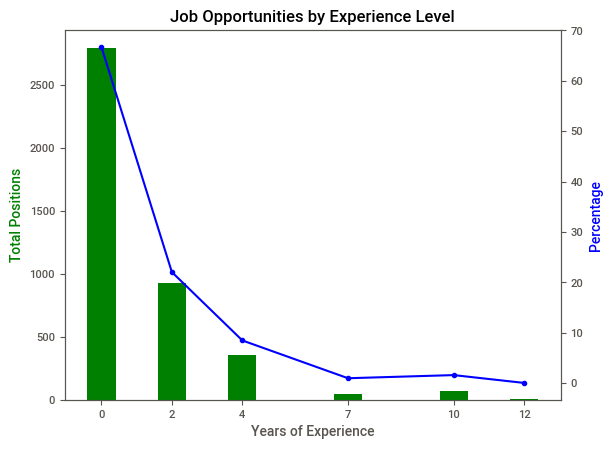

c:\Users\Reyad\AppData\Local\Programs\Python\Python311\Lib\site-packages\dtale\ppscore\calculation.py:212: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Reyad\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning:

Degrees of freedom <= 0 for slice

C:\Users\Reyad\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning:

divide by zero encountered in divide

C:\Users\Reyad\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning:

invalid value encountered in multiply

c:\Users\Reyad\AppData\Local\Programs\Python\Python311\Lib\site-packages\dtale\ppscore\calculation.py:212: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Reyad\AppData\Local\Programs\Python\Python311\L

In [ ]:
# Group by 'exper' and sum the 'total_positions'
experience_group = df.groupby('exper')['total_positions'].sum().reset_index()

# Calculate the percentage
experience_group['percentage'] = (experience_group['total_positions'] / experience_group['total_positions'].sum()) * 100

# Plotting
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(experience_group['exper'], experience_group['total_positions'], color='g')
ax2.plot(experience_group['exper'], experience_group['percentage'], color='b', marker='o')

ax1.set_xlabel('Years of Experience')
ax1.set_ylabel('Total Positions', color='g')
ax2.set_ylabel('Percentage', color='b')

plt.title('Job Opportunities by Experience Level')
ax1.set_xticks(experience_group['exper'])  # Ensure x-axis has proper ticks
plt.show()

**numerical & numerical --> (Scatter plot, line chart)**

<p style="color:blue">Extra1. What is the average salary for each experience category?</p>


![alt text](images/q3.png)

We could also use a correlation matrix to get more specific information about the relationship between these two variables.